In [1]:
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
from decimal import *
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [2]:
#getting the data

FTRAIN = '~/notebooks/training.csv'
FTEST = '~/notebooks/test.csv'

def load(test = False, cols = None):
    '''Loads data from FTEST if *test* is true, otherwise from FTRAIN.' 
    Pass a list of *cols* if you are only interested in a
    subset of the target columns'''
    
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname)) #load pandas dataframe
    print(list(df)) #print the names of columns in the dataframe
    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im,sep=' ')) 
    #image column has pixel values separated by space; convert the values to numpy arrays
    
    if cols: #get a subset of columns
        df = df[list(cols) + ['Image']]
        
    print('Count of observations in training data by features')
    print(df.count()) #prints number of values for each column
    df = df.dropna() #drop all rows that have missing values in them
    
    X = np.vstack(df['Image'].values)/255
    X = X.astype(np.float32)
    
    if not test:
        y  = df[df.columns[:-1]].values
        y = (y-48)/48
        shuffle = np.random.permutation(np.arange(X.shape[0]))
        X, y = X[shuffle], y[shuffle]
        y = y.astype(np.float32)
    else:
        y = None
        
    return X,y

Xnp,ynp = load()

print('Total training data')
print("Xnp.shape = = {}; Xnp.min == {:.3f}; Xnp.max == {:.3f}".format(Xnp.shape, Xnp.min(),Xnp.max()))
print("ynp.shape = = {}; ynp.min == {:.3f}; ynp.max == {:.3f}".format(ynp.shape, ynp.min(),ynp.max()))
dev_size = 0.2
Xdev,ydev = Xnp[int(Xnp.shape[0]*(1-dev_size)):,:],ynp[int(Xnp.shape[0]*(1-dev_size)):] #setting aside a 20% sample for validation
Xnp,ynp = Xnp[:int(Xnp.shape[0]*(1-dev_size)),:],ynp[:int(Xnp.shape[0]*(1-dev_size))]
X_test, _ = load(test=True)

print('Training data split into train and dev data')
print("Xnp.shape = = {}; Xnp.min == {:.3f}; Xnp.max == {:.3f}".format(Xnp.shape, Xnp.min(),Xnp.max()))
print("ynp.shape = = {}; ynp.min == {:.3f}; ynp.max == {:.3f}".format(ynp.shape, ynp.min(),ynp.max()))
print("Xdev.shape = = {}; Xdev.min == {:.3f}; Xdev.max == {:.3f}".format(Xdev.shape, Xdev.min(),Xdev.max()))
print("ydev.shape = = {}; ydev.min == {:.3f}; ydev.max == {:.3f}".format(ydev.shape, ydev.min(),ydev.max()))

['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'Image']
Count of observations in training data by features
left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
lef

0 Train loss:0.132 Dev loss:0.135 ratio train/dev:0.98
10 Train loss:0.095 Dev loss:0.093 ratio train/dev:1.02
20 Train loss:0.084 Dev loss:0.090 ratio train/dev:0.93
30 Train loss:0.073 Dev loss:0.082 ratio train/dev:0.89
40 Train loss:0.064 Dev loss:0.078 ratio train/dev:0.82
50 Train loss:0.061 Dev loss:0.074 ratio train/dev:0.83
60 Train loss:0.062 Dev loss:0.071 ratio train/dev:0.87
70 Train loss:0.057 Dev loss:0.070 ratio train/dev:0.81
80 Train loss:0.055 Dev loss:0.067 ratio train/dev:0.82
90 Train loss:0.057 Dev loss:0.067 ratio train/dev:0.85
100 Train loss:0.053 Dev loss:0.065 ratio train/dev:0.81
110 Train loss:0.055 Dev loss:0.064 ratio train/dev:0.86
120 Train loss:0.051 Dev loss:0.063 ratio train/dev:0.81
130 Train loss:0.052 Dev loss:0.065 ratio train/dev:0.79
140 Train loss:0.056 Dev loss:0.063 ratio train/dev:0.89
150 Train loss:0.048 Dev loss:0.062 ratio train/dev:0.78
160 Train loss:0.048 Dev loss:0.060 ratio train/dev:0.81
170 Train loss:0.044 Dev loss:0.060 ratio 

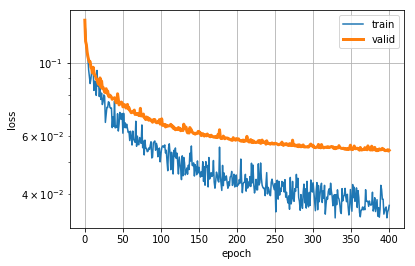

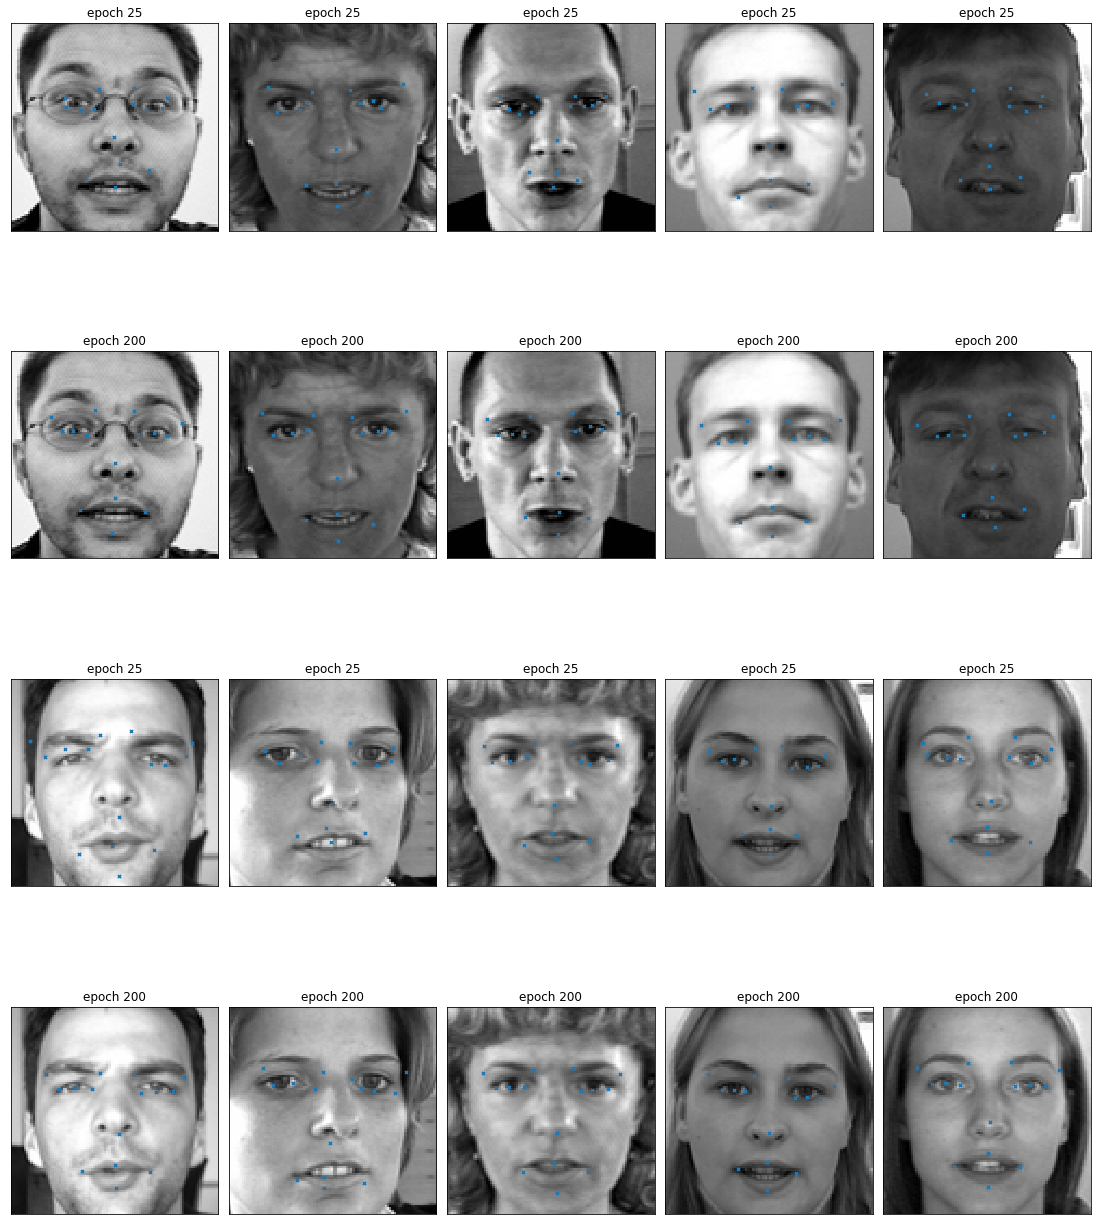

In [13]:
from tensorflow.contrib.layers import fully_connected

tf.reset_default_graph()

n_inputs = Xnp.shape[1]
n_hidden1 = 100
n_hidden2 = 60
n_outputs = 30

X = tf.placeholder(tf.float32,shape = (None,n_inputs),name = 'X')
y = tf.placeholder(tf.float32,shape = (None,n_outputs),name = 'y')

with tf.name_scope('dnn'):
    hidden1 = fully_connected(X,n_hidden1,scope = 'hidden1') #uses default activation function of relu, can be changed.
    #hidden2 = fully_connected(hidden1,n_hidden2,scope = 'hidden2') #took this layer out as we have too few data points to esimtate this many parameters
    pred_keypoints = fully_connected(hidden1,n_outputs,activation_fn = None,scope = 'outputs')
    
    
with tf.name_scope('loss'):
    loss = tf.reduce_mean(np.square(pred_keypoints - y))
    
    
learning_rate = 0.01
momentum = 0.9


with tf.name_scope('train'):
    optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum = momentum) #works better than gradientdescentoptimizer
    training_op = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()

n_epochs = 401
batch_size = 50
train_loss_data = np.zeros((n_epochs,2))
dev_loss_data = np.zeros((n_epochs,2))

time_start = time.time()
time_1000_start = time.time()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        shuffle = np.random.permutation(np.arange(Xnp.shape[0])) #shuffle the training data in each epoch
        Xnp, ynp = Xnp[shuffle], ynp[shuffle]
        for i in range(int(Xnp.shape[0]//batch_size)): #run through most of the data points in each epoch
            X_batch,y_batch = Xnp[i*batch_size:(i+1)*batch_size,:],ynp[i*batch_size:(i+1)*batch_size]
            #print(i,X_batch[1,1],y_batch[1])
            sess.run(training_op,feed_dict = {X:X_batch,y:y_batch})
            loss_train = loss.eval(feed_dict = {X:X_batch,y:y_batch})
            loss_dev = loss.eval(feed_dict = {X:Xdev,y:ydev})
            train_loss_data[epoch,:] = epoch,np.sqrt(loss_train)
            dev_loss_data[epoch,:] = epoch,np.sqrt(loss_dev)
            
        if epoch%10 == 0:
            print(epoch,'Train loss:%0.3f'%np.sqrt(loss_train),'Dev loss:%0.3f'%np.sqrt(loss_dev),'ratio train/dev:%0.2f'%np.sqrt(loss_train/loss_dev))
        if epoch == 25:
            y_pred_25 = sess.run(pred_keypoints,feed_dict = {X:X_test})
        elif epoch == 75:    
            y_pred_75 = sess.run(pred_keypoints,feed_dict = {X:X_test})
    time_end = time.time()  
    y_pred = sess.run(pred_keypoints,feed_dict = {X:X_test})
   
    print('Total time taken:',time_end-time_start)
    
#Plot a graph of the train vs test loss data:
    
plt.plot(train_loss_data[:,1], label="train")
plt.plot(dev_loss_data[:,1], linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

#Examine a few test cases to see accuracy of prediction:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

fig = plt.figure(figsize=(15, 18))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(4, 5, i + 1 + 5*int(i/5), xticks=[], yticks=[],title = 'epoch 25')
    plot_sample(X_test[i], y_pred_25[i], ax)
    ax = fig.add_subplot(4,5,i+6+ 5*int(i/5),xticks=[],yticks=[],title = 'epoch 200')
    plot_sample(X_test[i], y_pred[i], ax)

plt.show()

0 Train loss:0.329 Dev loss:0.330 ratio train/dev:1.00
5 Train loss:0.147 Dev loss:0.150 ratio train/dev:0.98
10 Train loss:0.131 Dev loss:0.131 ratio train/dev:1.00
15 Train loss:0.116 Dev loss:0.121 ratio train/dev:0.96
20 Train loss:0.108 Dev loss:0.114 ratio train/dev:0.95
25 Train loss:0.109 Dev loss:0.109 ratio train/dev:1.00
30 Train loss:0.102 Dev loss:0.105 ratio train/dev:0.97
35 Train loss:0.100 Dev loss:0.102 ratio train/dev:0.98
40 Train loss:0.100 Dev loss:0.099 ratio train/dev:1.01
45 Train loss:0.094 Dev loss:0.096 ratio train/dev:0.98
50 Train loss:0.097 Dev loss:0.095 ratio train/dev:1.02
55 Train loss:0.089 Dev loss:0.093 ratio train/dev:0.96
60 Train loss:0.092 Dev loss:0.092 ratio train/dev:1.01
65 Train loss:0.093 Dev loss:0.090 ratio train/dev:1.03
70 Train loss:0.089 Dev loss:0.089 ratio train/dev:1.01
75 Train loss:0.086 Dev loss:0.088 ratio train/dev:0.98
80 Train loss:0.082 Dev loss:0.087 ratio train/dev:0.95
85 Train loss:0.084 Dev loss:0.086 ratio train/dev

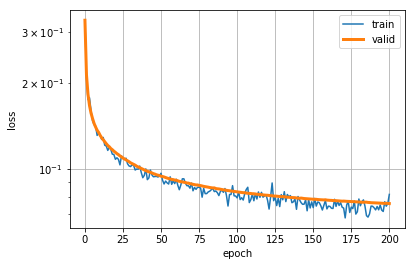

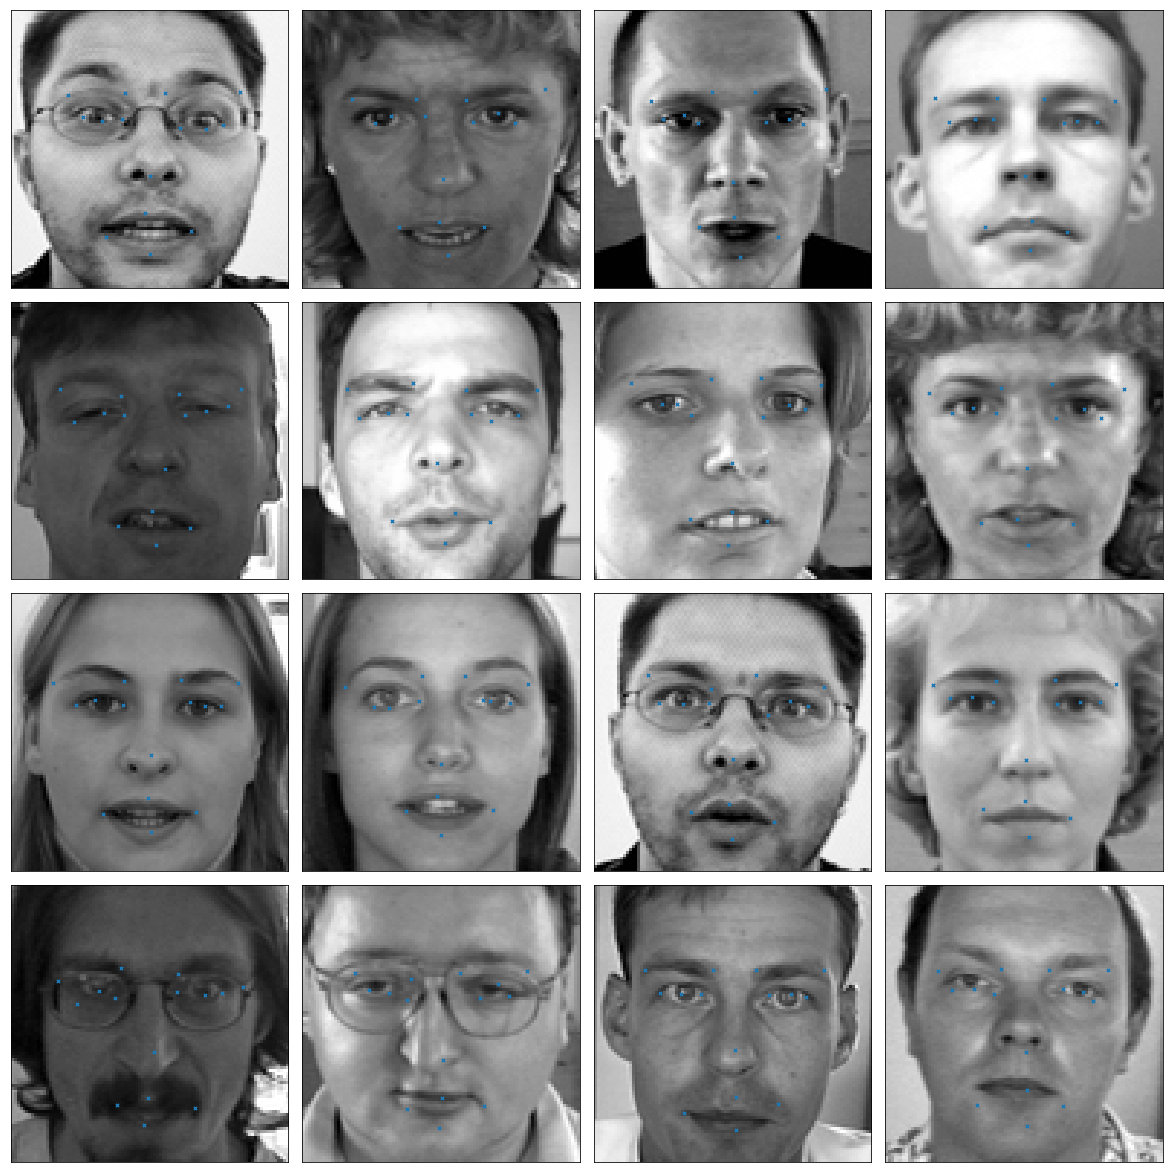

In [13]:
#Building a convolutional neural network
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides = [1,1,1,1],padding = 'SAME')

def max_pool_2X2(x):
    return(tf.nn.max_pool(x,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME'))

#input data
x = tf.placeholder(tf.float32,[None,Xnp.shape[1]])
y = tf.placeholder(tf.float32,[None,ynp.shape[1]])

#First convolutional layer
W_conv1 = weight_variable([3,3,1,32]) #first two dimensions are patch size, next is channels, and last is the number of output channels
b_conv1 = bias_variable([32]) #bias vector has a component for each output channel

X_image = tf.reshape(x,[-1,96,96,1]) #2nd and 3rd dimension is image width and height, final dimension is number of color channels

h_conv1 = tf.nn.relu(conv2d(X_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2X2(h_conv1) #reduces image size to 48X48

#Second covolutional layer
W_conv2 = weight_variable([2,2,32,64]) # 64 features for each 2X2 patch
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)
h_pool2 = max_pool_2X2(h_conv2)  #reduces image size to 24X24

#Third convolutional layer
W_conv3 = weight_variable([2,2,64,128]) # 128 features for each 2X2 patch
b_conv3 = bias_variable([128])

h_conv3 = tf.nn.relu(conv2d(h_pool2,W_conv3) + b_conv3)
h_pool3 = max_pool_2X2(h_conv3)  #reduces image size to 24X24


#Densely connected layer
W_fc1 = weight_variable([12*12*128,512]) #fully connected layer with 1024 neurons to allow processing the entire image
b_fc1 = bias_variable([512])

# W_fc2 = weight_variable([512,512]) #fully connected layer with 1024 neurons to allow processing the entire image
# b_fc2 = bias_variable([512])

h_pool3_flat = tf.reshape(h_pool3,[-1,12*12*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat,W_fc1) + b_fc1)

#Dropout
#keep_prob = tf.placeholder(tf.float32) # variable to turn on dropout during training, and turn off during test
#h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

#Readout layer
W_fc2 = weight_variable([512,30])
b_fc2 = bias_variable([30])

y_conv = tf.matmul(h_fc1,W_fc2) + b_fc2

#loss function
loss = tf.reduce_mean(np.square(y_conv - y))

#optimizer
#train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
learning_rate = 0.001
momentum = 0.9
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum = momentum,use_nesterov = True) 
train_step = optimizer.minimize(loss)

n_epochs = 201
batch_size = 100
train_loss_data = np.zeros((n_epochs,2))
dev_loss_data = np.zeros((n_epochs,2))
y_pred = np.zeros((X_test.shape[0],ynp.shape[1]))


time_start = time.time()
time_1000_start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        #print('starting epoch:',epoch)
        shuffle = np.random.permutation(np.arange(Xnp.shape[0])) #shuffle the training data in each epoch
        Xnp, ynp = Xnp[shuffle], ynp[shuffle]
        
        for i in range(int(Xnp.shape[0]//batch_size)-4): #run through most of the data points in each epoch
            X_batch,y_batch = Xnp[i*batch_size:(i+1)*batch_size,:],ynp[i*batch_size:(i+1)*batch_size]
            #print(i,X_batch[1,1],y_batch[1])
            sess.run(train_step,feed_dict = {x:X_batch,y:y_batch})
            loss_train = loss.eval(feed_dict = {x:X_batch,y:y_batch})
            loss_dev = loss.eval(feed_dict = {x:Xdev,y:ydev})
        train_loss_data[epoch,:] = epoch,np.sqrt(loss_train)
        dev_loss_data[epoch,:] = epoch,np.sqrt(loss_dev)
        
        if epoch%5 == 0:
            print(epoch,'Train loss:%0.3f'%np.sqrt(loss_train),'Dev loss:%0.3f'%np.sqrt(loss_dev),'ratio train/dev:%0.2f'%np.sqrt(loss_train/loss_dev))
        
    time_end = time.time()
    print('Total time taken:',time_end-time_start)
    for i in range(int(X_test.shape[0]//batch_size)): #doing predictions in batches
            X_batch = X_test[i*batch_size:(i+1)*batch_size,:]
            y_pred[i*batch_size:(i+1)*batch_size] = sess.run(y_conv,feed_dict = {x:X_batch})
   


#Plot a graph of the train vs test loss data:
    
plt.plot(train_loss_data[:,1], label="train")
plt.plot(dev_loss_data[:,1], linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

#Examine a few test cases to see accuracy of prediction:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)

plt.show()



0 Train loss:6.345 Dev loss:6.294 ratio train/dev:1.01
5 Train loss:0.325 Dev loss:0.323 ratio train/dev:1.01
10 Train loss:0.199 Dev loss:0.201 ratio train/dev:0.99
15 Train loss:0.162 Dev loss:0.160 ratio train/dev:1.01
20 Train loss:0.129 Dev loss:0.129 ratio train/dev:0.99
25 Train loss:0.117 Dev loss:0.118 ratio train/dev:0.99
30 Train loss:0.105 Dev loss:0.107 ratio train/dev:0.99
35 Train loss:0.105 Dev loss:0.101 ratio train/dev:1.04
40 Train loss:0.095 Dev loss:0.097 ratio train/dev:0.98
45 Train loss:0.093 Dev loss:0.093 ratio train/dev:1.01
50 Train loss:0.092 Dev loss:0.090 ratio train/dev:1.02
55 Train loss:0.087 Dev loss:0.088 ratio train/dev:0.99
60 Train loss:0.082 Dev loss:0.086 ratio train/dev:0.96
65 Train loss:0.084 Dev loss:0.084 ratio train/dev:0.99
70 Train loss:0.085 Dev loss:0.083 ratio train/dev:1.02
75 Train loss:0.082 Dev loss:0.082 ratio train/dev:1.00
80 Train loss:0.085 Dev loss:0.081 ratio train/dev:1.05
85 Train loss:0.080 Dev loss:0.081 ratio train/dev

725 Train loss:0.069 Dev loss:0.066 ratio train/dev:1.03
730 Train loss:0.067 Dev loss:0.066 ratio train/dev:1.01
735 Train loss:0.070 Dev loss:0.066 ratio train/dev:1.05
740 Train loss:0.067 Dev loss:0.066 ratio train/dev:1.00
745 Train loss:0.069 Dev loss:0.066 ratio train/dev:1.04
750 Train loss:0.069 Dev loss:0.066 ratio train/dev:1.04
755 Train loss:0.063 Dev loss:0.066 ratio train/dev:0.96
760 Train loss:0.068 Dev loss:0.066 ratio train/dev:1.03
765 Train loss:0.064 Dev loss:0.066 ratio train/dev:0.96
770 Train loss:0.066 Dev loss:0.066 ratio train/dev:1.00
775 Train loss:0.062 Dev loss:0.066 ratio train/dev:0.94
780 Train loss:0.067 Dev loss:0.066 ratio train/dev:1.00
785 Train loss:0.066 Dev loss:0.066 ratio train/dev:1.00
790 Train loss:0.067 Dev loss:0.066 ratio train/dev:1.01
795 Train loss:0.066 Dev loss:0.066 ratio train/dev:1.00
800 Train loss:0.064 Dev loss:0.066 ratio train/dev:0.97
805 Train loss:0.065 Dev loss:0.066 ratio train/dev:0.98
810 Train loss:0.064 Dev loss:0

1440 Train loss:0.069 Dev loss:0.065 ratio train/dev:1.06
1445 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.00
1450 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.01
1455 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.01
1460 Train loss:0.072 Dev loss:0.065 ratio train/dev:1.11
1465 Train loss:0.075 Dev loss:0.065 ratio train/dev:1.15
1470 Train loss:0.065 Dev loss:0.065 ratio train/dev:1.00
1475 Train loss:0.067 Dev loss:0.065 ratio train/dev:1.03
1480 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.02
1485 Train loss:0.059 Dev loss:0.065 ratio train/dev:0.91
1490 Train loss:0.059 Dev loss:0.065 ratio train/dev:0.91
1495 Train loss:0.063 Dev loss:0.065 ratio train/dev:0.96
1500 Train loss:0.068 Dev loss:0.065 ratio train/dev:1.05
1505 Train loss:0.070 Dev loss:0.065 ratio train/dev:1.08
1510 Train loss:0.061 Dev loss:0.065 ratio train/dev:0.94
1515 Train loss:0.061 Dev loss:0.065 ratio train/dev:0.94
1520 Train loss:0.065 Dev loss:0.065 ratio train/dev:1.00
1525 Train los

2150 Train loss:0.069 Dev loss:0.065 ratio train/dev:1.06
2155 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.02
2160 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.02
2165 Train loss:0.063 Dev loss:0.065 ratio train/dev:0.97
2170 Train loss:0.061 Dev loss:0.065 ratio train/dev:0.93
2175 Train loss:0.068 Dev loss:0.065 ratio train/dev:1.05
2180 Train loss:0.067 Dev loss:0.065 ratio train/dev:1.03
2185 Train loss:0.065 Dev loss:0.065 ratio train/dev:1.00
2190 Train loss:0.067 Dev loss:0.065 ratio train/dev:1.04
2195 Train loss:0.067 Dev loss:0.065 ratio train/dev:1.03
2200 Train loss:0.070 Dev loss:0.065 ratio train/dev:1.08
2205 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.02
2210 Train loss:0.066 Dev loss:0.065 ratio train/dev:1.02
2215 Train loss:0.063 Dev loss:0.065 ratio train/dev:0.98
2220 Train loss:0.072 Dev loss:0.065 ratio train/dev:1.11
2225 Train loss:0.067 Dev loss:0.065 ratio train/dev:1.03
2230 Train loss:0.062 Dev loss:0.065 ratio train/dev:0.95
2235 Train los

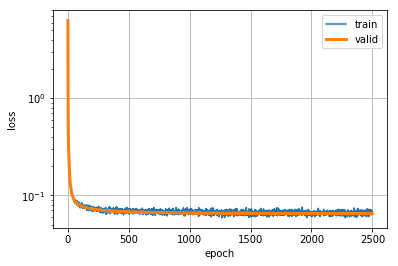

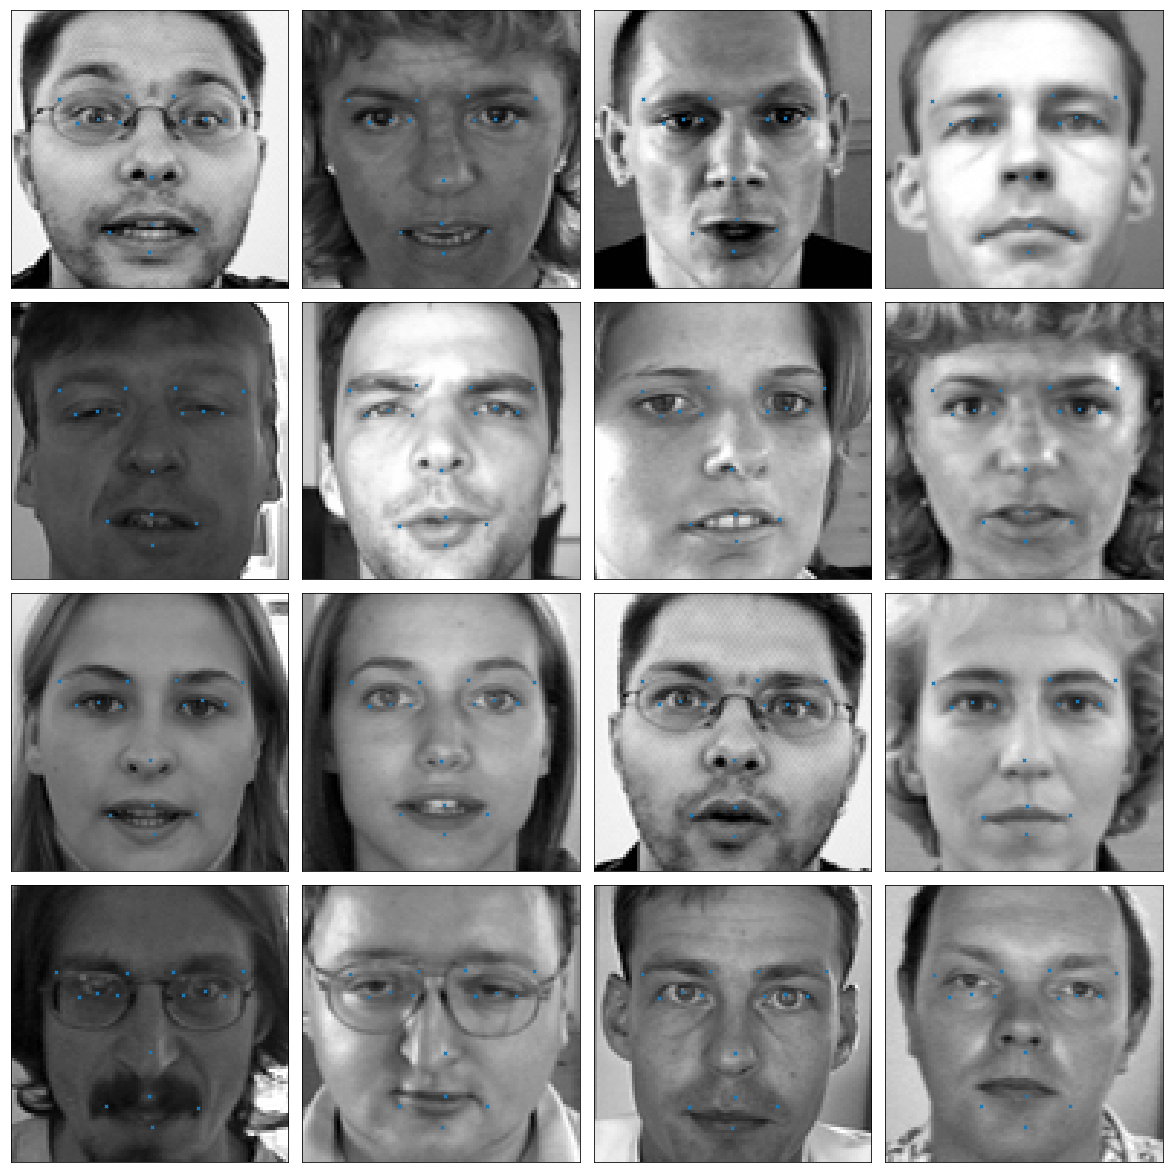

In [3]:
#CNN with more stochastic batch training ie each batch is reshuffled instead of reshuffling and then doing a full pass through the data
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides = [1,1,1,1],padding = 'SAME')

def max_pool_2X2(x):
    return(tf.nn.max_pool(x,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME'))

#input data
x = tf.placeholder(tf.float32,[None,Xnp.shape[1]])
y = tf.placeholder(tf.float32,[None,ynp.shape[1]])

#First convolutional layer
W_conv1 = weight_variable([3,3,1,32]) #first two dimensions are patch size, next is channels, and last is the number of output channels
b_conv1 = bias_variable([32]) #bias vector has a component for each output channel

X_image = tf.reshape(x,[-1,96,96,1]) #2nd and 3rd dimension is image width and height, final dimension is number of color channels

h_conv1 = tf.nn.relu(conv2d(X_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2X2(h_conv1) #reduces image size to 48X48

#Second covolutional layer
W_conv2 = weight_variable([2,2,32,64]) # 64 features for each 2X2 patch
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)
h_pool2 = max_pool_2X2(h_conv2)  #reduces image size to 24X24

#Third convolutional layer
W_conv3 = weight_variable([2,2,64,128]) # 128 features for each 2X2 patch
b_conv3 = bias_variable([128])

h_conv3 = tf.nn.relu(conv2d(h_pool2,W_conv3) + b_conv3)
h_pool3 = max_pool_2X2(h_conv3)  #reduces image size to 24X24


#Densely connected layer
W_fc1 = weight_variable([12*12*128,512]) #fully connected layer with 1024 neurons to allow processing the entire image
b_fc1 = bias_variable([512])

# W_fc2 = weight_variable([512,512]) #fully connected layer with 1024 neurons to allow processing the entire image
# b_fc2 = bias_variable([512])

h_pool3_flat = tf.reshape(h_pool3,[-1,12*12*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat,W_fc1) + b_fc1)

#Dropout
#keep_prob = tf.placeholder(tf.float32) # variable to turn on dropout during training, and turn off during test
#h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

#Readout layer
W_fc2 = weight_variable([512,30])
b_fc2 = bias_variable([30])

y_conv = tf.matmul(h_fc1,W_fc2) + b_fc2

#loss function
loss = tf.reduce_mean(np.square(y_conv - y))

#optimizer
#train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
learning_rate = 0.005
momentum = 0.9
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum = momentum,use_nesterov = True) 
train_step = optimizer.minimize(loss)

n_epochs = 2500
batch_size = 128
train_loss_data = np.zeros((n_epochs,2))
dev_loss_data = np.zeros((n_epochs,2))
y_pred = np.zeros((X_test.shape[0],ynp.shape[1]))


time_start = time.time()
time_1000_start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        #print('starting epoch:',epoch)
        shuffle = np.random.permutation(np.arange(Xnp.shape[0])) #shuffle the training data in each epoch
        Xnp, ynp = Xnp[shuffle], ynp[shuffle]
        X_batch,y_batch = Xnp[:batch_size,:],ynp[:batch_size]
        sess.run(train_step,feed_dict = {x:X_batch,y:y_batch})
        loss_train = loss.eval(feed_dict = {x:X_batch,y:y_batch})
        loss_dev = loss.eval(feed_dict = {x:Xdev,y:ydev})
        train_loss_data[epoch,:] = epoch,np.sqrt(loss_train)
        dev_loss_data[epoch,:] = epoch,np.sqrt(loss_dev)
        
        if epoch%5 == 0:
            print(epoch,'Train loss:%0.3f'%np.sqrt(loss_train),'Dev loss:%0.3f'%np.sqrt(loss_dev),'ratio train/dev:%0.2f'%np.sqrt(loss_train/loss_dev))
        
    time_end = time.time()
    print('Total time taken:',time_end-time_start)
    for i in range(int(X_test.shape[0]//batch_size)): #doing predictions in batches
            X_batch = X_test[i*batch_size:(i+1)*batch_size,:]
            y_pred[i*batch_size:(i+1)*batch_size] = sess.run(y_conv,feed_dict = {x:X_batch})
   


#Plot a graph of the train vs test loss data:
    
plt.plot(train_loss_data[:,1], label="train")
plt.plot(dev_loss_data[:,1], linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

#Examine a few test cases to see accuracy of prediction:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)

plt.show()



In [4]:

#CNN - trying Xavier_initializer
def weight_variable(shape):
    #initial = tf.truncated_normal(shape,stddev=0.1)
    weights = tf.get_variable('weights3',shape = shape, initializer = tf.contrib.layers.xavier_initializer()) #Alternative initializer
    return weights

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides = [1,1,1,1],padding = 'SAME')

def max_pool_2X2(x):
    return(tf.nn.max_pool(x,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME'))

#input data
x = tf.placeholder(tf.float32,[None,Xnp.shape[1]])
y = tf.placeholder(tf.float32,[None,ynp.shape[1]])

#First convolutional layer
with tf.variable_scope('conv1'):
    W_conv1 = weight_variable([3,3,1,32]) #first two dimensions are patch size, next is channels, and last is the number of output channels
    b_conv1 = bias_variable([32]) #bias vector has a component for each output channel

    X_image = tf.reshape(x,[-1,96,96,1]) #2nd and 3rd dimension is image width and height, final dimension is number of color channels

with tf.variable_scope('pool1'):
    h_conv1 = tf.nn.relu(conv2d(X_image,W_conv1) + b_conv1)
    h_pool1 = max_pool_2X2(h_conv1) #reduces image size to 48X48

#Second covolutional layer
with tf.variable_scope('conv2'):
    W_conv2 = weight_variable([2,2,32,64]) # 64 features for each 2X2 patch
    b_conv2 = bias_variable([64])

with tf.variable_scope('pool2'):
    h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)
    h_pool2 = max_pool_2X2(h_conv2)  #reduces image size to 24X24

#Third covolutional layer
with tf.variable_scope('conv3'):
    W_conv3 = weight_variable([2,2,64,128]) # 64 features for each 2X2 patch
    b_conv3 = bias_variable([128])

with tf.variable_scope('pool3'):
    h_conv3 = tf.nn.relu(conv2d(h_pool2,W_conv3) + b_conv3)
    h_pool3 = max_pool_2X2(h_conv3)  #reduces image size to 24X24


#Densely connected layer 1
with tf.variable_scope('fc4'):
    W_fc1 = weight_variable([12*12*128,512]) #fully connected layer with 1024 neurons to allow processing the entire image
    b_fc1 = bias_variable([512])

    h_pool3_flat = tf.reshape(h_pool3,[-1,12*12*128])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat,W_fc1) + b_fc1)

#Densely connected layer 2
with tf.variable_scope('fc5'):
    W_fc2 = weight_variable([512,512]) #fully connected layer with 1024 neurons to allow processing the entire image
    b_fc2 = bias_variable([512])
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1,W_fc2) + b_fc2)

#Dropout
#keep_prob = tf.placeholder(tf.float32) # variable to turn on dropout during training, and turn off during test
#h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

#Readout layer
with tf.variable_scope('out'):
    W_fc3 = weight_variable([512,30])
    b_fc3 = bias_variable([30])

    y_conv = tf.matmul(h_fc2,W_fc3) + b_fc3

#loss function
loss = tf.reduce_mean(np.square(y_conv - y))

#optimizer
#train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
learning_rate = 0.001
momentum = 0.9
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum = momentum,use_nesterov = True) 
train_step = optimizer.minimize(loss)

n_epochs = 201
batch_size = 100
train_loss_data = np.zeros((n_epochs,2))
dev_loss_data = np.zeros((n_epochs,2))
y_pred = np.zeros((X_test.shape[0],ynp.shape[1]))


time_start = time.time()
time_1000_start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        print('starting epoch:',epoch)
        shuffle = np.random.permutation(np.arange(Xnp.shape[0])) #shuffle the training data in each epoch
        Xnp, ynp = Xnp[shuffle], ynp[shuffle]
        
        for i in range(int(Xnp.shape[0]//batch_size)): #run through most of the data points in each epoch
            X_batch,y_batch = Xnp[i*batch_size:(i+1)*batch_size,:],ynp[i*batch_size:(i+1)*batch_size]
            #print(i,X_batch[1,1],y_batch[1])
            sess.run(train_step,feed_dict = {x:X_batch,y:y_batch})
            loss_train = loss.eval(feed_dict = {x:X_batch,y:y_batch})
            loss_dev = loss.eval(feed_dict = {x:Xdev,y:ydev})
        train_loss_data[epoch,:] = epoch,np.sqrt(loss_train)
        dev_loss_data[epoch,:] = epoch,np.sqrt(loss_dev)
        
        if epoch%1 == 0:
            print(epoch,'Train loss:%0.3f'%np.sqrt(loss_train),'Dev loss:%0.3f'%np.sqrt(loss_dev),'ratio train/dev:%0.2f'%np.sqrt(loss_train/loss_dev))
        
    time_end = time.time()
    for i in range(int(X_test.shape[0]//batch_size)): #doing predictions in batches
            X_batch = X_test[i*batch_size:(i+1)*batch_size,:]
            y_pred[i*batch_size:(i+1)*batch_size] = sess.run(y_conv,feed_dict = {x:X_batch})
   
print('Total time taken:',time_end-time_start)

#Plot a graph of the train vs test loss data:
    
plt.plot(train_loss_data[:,1], label="train")
plt.plot(dev_loss_data[:,1], linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

#Examine a few test cases to see accuracy of prediction:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)

plt.show()

starting epoch: 0


KeyboardInterrupt: 

starting
0 Train loss:0.146 Dev loss:0.148 ratio train/dev:0.99
10 Train loss:0.065 Dev loss:0.068 ratio train/dev:0.96
20 Train loss:0.064 Dev loss:0.066 ratio train/dev:0.97
30 Train loss:0.063 Dev loss:0.066 ratio train/dev:0.96
40 Train loss:0.063 Dev loss:0.065 ratio train/dev:0.97
50 Train loss:0.068 Dev loss:0.065 ratio train/dev:1.05
60 Train loss:0.062 Dev loss:0.064 ratio train/dev:0.96
70 Train loss:0.065 Dev loss:0.064 ratio train/dev:1.02
80 Train loss:0.061 Dev loss:0.064 ratio train/dev:0.96
90 Train loss:0.058 Dev loss:0.064 ratio train/dev:0.92
100 Train loss:0.066 Dev loss:0.063 ratio train/dev:1.04
110 Train loss:0.059 Dev loss:0.063 ratio train/dev:0.94
120 Train loss:0.059 Dev loss:0.062 ratio train/dev:0.95
130 Train loss:0.058 Dev loss:0.062 ratio train/dev:0.93
140 Train loss:0.057 Dev loss:0.062 ratio train/dev:0.93
150 Train loss:0.056 Dev loss:0.061 ratio train/dev:0.91
160 Train loss:0.057 Dev loss:0.061 ratio train/dev:0.94
170 Train loss:0.058 Dev loss:0.0

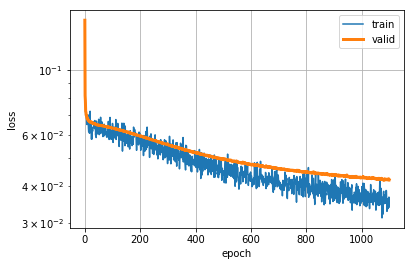

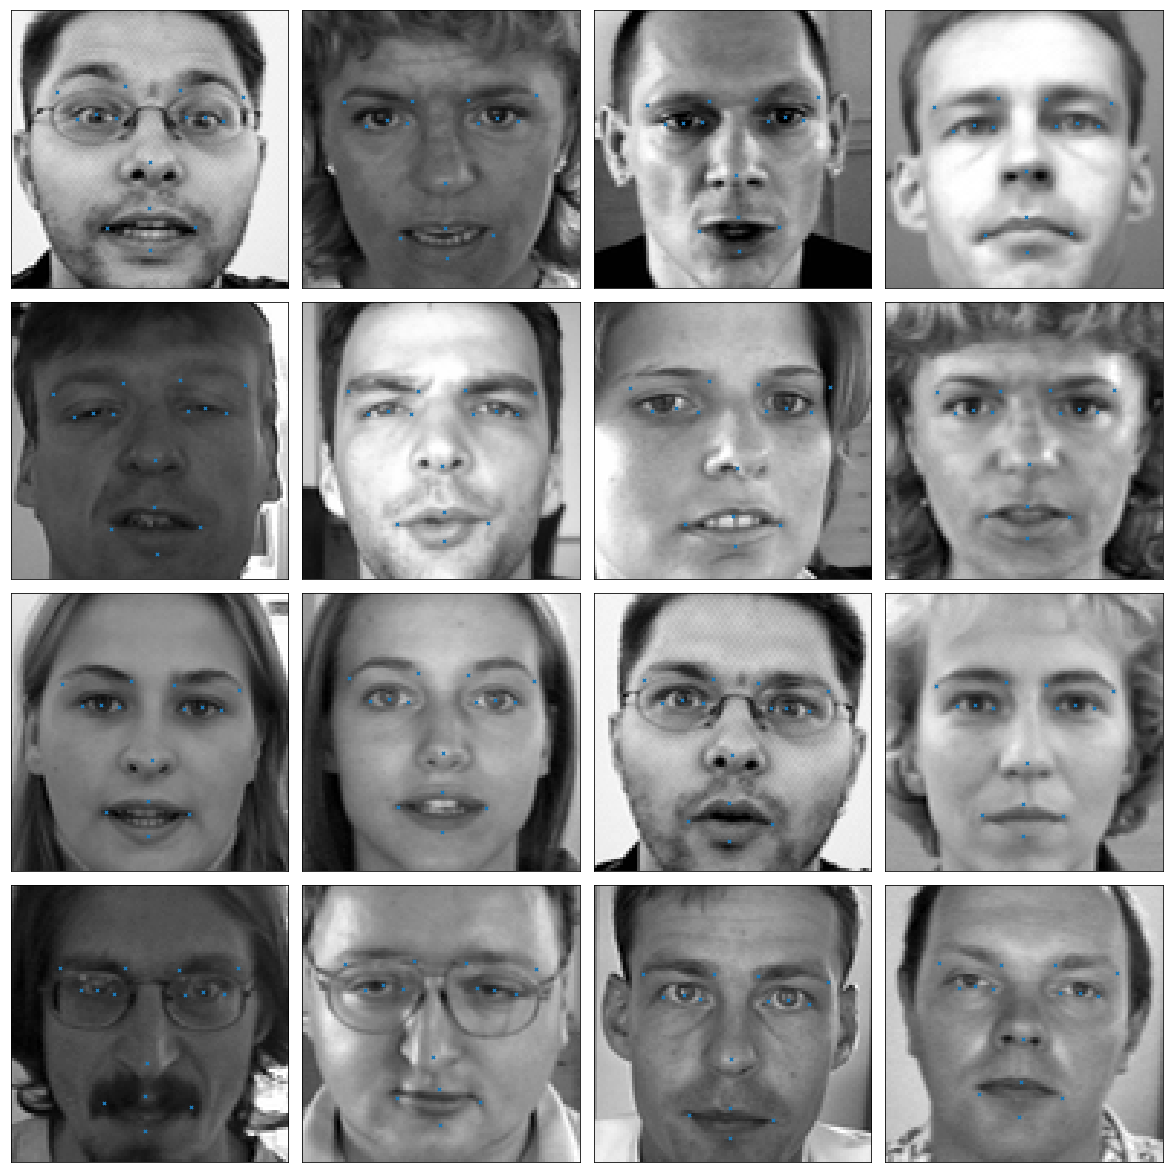

In [5]:
#CNN - Adding dropout. still has xavier, second hidden layer
def weight_variable(shape):
    #initial = tf.truncated_normal(shape,stddev=0.1)
    weights = tf.get_variable('weights2',shape = shape, initializer = tf.glorot_uniform_initializer()) #Alternative initializer
    return weights

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    #bias = tf.get_variable('bias2',shape = shape, initializer = tf.glorot_uniform_initializer()) #Alternative initializer
    return tf.Variable(initial)
    #return bias

def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides = [1,1,1,1],padding = 'SAME')

def max_pool_2X2(x):
    return(tf.nn.max_pool(x,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME'))

#input data
x = tf.placeholder(tf.float32,[None,Xnp.shape[1]])
y = tf.placeholder(tf.float32,[None,ynp.shape[1]])

#First convolutional layer
with tf.variable_scope('conv1'):
    W_conv1 = weight_variable([3,3,1,32]) #first two dimensions are patch size, next is channels, and last is the number of output channels
    b_conv1 = bias_variable([32]) #bias vector has a component for each output channel

    X_image = tf.reshape(x,[-1,96,96,1]) #2nd and 3rd dimension is image width and height, final dimension is number of color channels

with tf.variable_scope('pool1'):
    h_conv1 = tf.nn.relu(conv2d(X_image,W_conv1) + b_conv1)
    h_pool1 = max_pool_2X2(h_conv1) #reduces image size to 48X48

#Second covolutional layer
with tf.variable_scope('conv2'):
    W_conv2 = weight_variable([2,2,32,64]) # 64 features for each 2X2 patch
    b_conv2 = bias_variable([64])

with tf.variable_scope('pool2'):
    h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)
    h_pool2 = max_pool_2X2(h_conv2)  #reduces image size to 24X24

#Third covolutional layer
with tf.variable_scope('conv3'):
    W_conv3 = weight_variable([2,2,64,128]) # 64 features for each 2X2 patch
    b_conv3 = bias_variable([128])

with tf.variable_scope('pool3'):
    h_conv3 = tf.nn.relu(conv2d(h_pool2,W_conv3) + b_conv3)
    h_pool3 = max_pool_2X2(h_conv3)  #reduces image size to 24X24


#Densely connected layer 1
with tf.variable_scope('fc4'):
    W_fc1 = weight_variable([12*12*128,512]) #fully connected layer with 1024 neurons to allow processing the entire image
    b_fc1 = bias_variable([512])

    h_pool3_flat = tf.reshape(h_pool3,[-1,12*12*128])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat,W_fc1) + b_fc1)
    
#Dropout
keep_prob = tf.placeholder(tf.float32) # variable to turn on dropout during training, and turn off during test
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

#Densely connected layer 2
with tf.variable_scope('fc5'):
    W_fc2 = weight_variable([512,512]) #fully connected layer with 1024 neurons to allow processing the entire image
    b_fc2 = bias_variable([512])
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop,W_fc2) + b_fc2)

#Readout layer
with tf.variable_scope('out'):
    W_fc3 = weight_variable([512,30])
    b_fc3 = bias_variable([30])

    y_conv = tf.matmul(h_fc2,W_fc3) + b_fc3

#loss function
loss = tf.reduce_mean(np.square(y_conv - y))

#optimizer
#train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
learning_rate = 0.01
momentum = 0.9
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate,momentum = momentum) 
train_step = optimizer.minimize(loss)

n_epochs = 1101
batch_size = 128
train_loss_data = np.zeros((n_epochs,2))
dev_loss_data = np.zeros((n_epochs,2))
y_pred = np.zeros((X_test.shape[0],ynp.shape[1]))


time_start = time.time()
print('starting')
time_1000_start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        #print('starting epoch:',epoch)
        shuffle = np.random.permutation(np.arange(Xnp.shape[0])) #shuffle the training data in each epoch
        Xnp, ynp = Xnp[shuffle], ynp[shuffle]
        
        for i in range(int(Xnp.shape[0]//batch_size)): #run through most of the data points in each epoch
            X_batch,y_batch = Xnp[i*batch_size:(i+1)*batch_size,:],ynp[i*batch_size:(i+1)*batch_size]
            #X_batch,y_batch = Xnp[:batch_size,:],ynp[:batch_size]
            #print(i,X_batch[1,1],y_batch[1])
            sess.run(train_step,feed_dict = {x:X_batch,y:y_batch,keep_prob:0.5})
            loss_train = loss.eval(feed_dict = {x:X_batch,y:y_batch,keep_prob:1.0})
        loss_dev = loss.eval(feed_dict = {x:Xdev,y:ydev,keep_prob:1.0})
        train_loss_data[epoch,:] = epoch,np.sqrt(loss_train)
        dev_loss_data[epoch,:] = epoch,np.sqrt(loss_dev)
        
        if epoch%10 == 0:
            print(epoch,'Train loss:%0.3f'%np.sqrt(loss_train),'Dev loss:%0.3f'%np.sqrt(loss_dev),'ratio train/dev:%0.2f'%np.sqrt(loss_train/loss_dev))
        
    time_end = time.time()
    for i in range(int(X_test.shape[0]//batch_size)): #doing predictions in batches
            X_batch = X_test[i*batch_size:(i+1)*batch_size,:]
            y_pred[i*batch_size:(i+1)*batch_size] = sess.run(y_conv,feed_dict = {x:X_batch,keep_prob:1.0})
   
print('Total time taken:',time_end-time_start)

#Plot a graph of the train vs test loss data:
    
plt.plot(train_loss_data[:,1], label="train")
plt.plot(dev_loss_data[:,1], linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

#Examine a few test cases to see accuracy of prediction:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)

plt.show()